# Default Rate Future Loan Prediction and Analysis


As per the problem statement, the steps that should be followed by the students are as follows :

- Loading Data
- Exploratory Data Analysis (EDA)
  - Data Cleaning
  - Variable Transformations
  - Plots to study trends
- Feature engineering and Variable Selection
- Model Building and Validation

The codes for each of these steps are as follows:

In [1]:
# Loading all the required libraries

%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


## Loading Data 

In [2]:
data = pd.read_csv("G:\Python\XYZCorp_LendingData.txt", 
                   encoding = 'utf-8', sep = '\t', low_memory=False)

data.shape

(855969, 73)

In [3]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


Next up, we want to get rid of sparsely populated variables, so we remove columns with more that 75% missing values

## Data Cleaning

In [4]:
# Dropping variables
vars_to_be_removed = ['policy_code', 'pymnt_plan', 'id', 'member_id', 'application_type', 
                      'acc_now_delinq','emp_title', 'zip_code','title']

data.drop( vars_to_be_removed , axis = 1, inplace = True )


We can remove the following variables, reasons described:
1. policy_code is always == 1
2. payment_plan has only 10 y and 887372 n
3. id and member_id are all unique, which is a bit misleading. So every record is a unique customer
4. application_type is 'INDIVIDUAL' for 99.94% of the records
5. acc_now_delinq is 0 for 99.5% of the records
6. emp_title not needed here, but it might be useful for the modelling (see below),
7. zip_code not needed for this level of analysis,
8. title can be removed as well

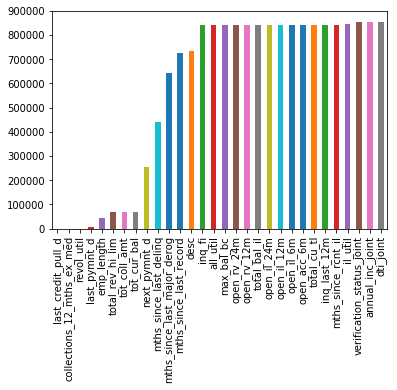

In [6]:
##  Missing Data Analysis 
# Visualize null count in overall dataframe
null_in_data = data.isnull().sum()
null_in_data = null_in_data[null_in_data > 0]
null_in_data.sort_values(inplace=True)

null_in_data.plot.bar()

In [7]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
dti_joint,855529,0.999486
annual_inc_joint,855527,0.999484
verification_status_joint,855527,0.999484
il_util,844360,0.986438
mths_since_rcnt_il,843035,0.984890
inq_last_12m,842681,0.984476
open_acc_6m,842681,0.984476
open_il_6m,842681,0.984476
open_il_12m,842681,0.984476
open_il_24m,842681,0.984476


In [8]:
# Checking for null values > 75% 
var_null_pc = data.isnull().sum(axis=0).sort_values( ascending=False)/float(len(data) )
var_null_pc[ var_null_pc > 0.75 ]

dti_joint                      0.999486
annual_inc_joint               0.999484
verification_status_joint      0.999484
il_util                        0.986438
mths_since_rcnt_il             0.984890
inq_last_12m                   0.984476
open_acc_6m                    0.984476
open_il_6m                     0.984476
open_il_12m                    0.984476
open_il_24m                    0.984476
open_rv_12m                    0.984476
open_rv_24m                    0.984476
max_bal_bc                     0.984476
all_util                       0.984476
inq_fi                         0.984476
total_cu_tl                    0.984476
total_bal_il                   0.984476
desc                           0.857691
mths_since_last_record         0.846742
mths_since_last_major_derog    0.750997
dtype: float64

* There are 20 variables which can be removed from modelling and analysis, which has greater than 75% of Null values

In [9]:
data.drop( var_null_pc[ var_null_pc > 0.75 ].index, axis = 1, inplace = True ) 
data.dropna( axis = 0, thresh = 30, inplace = True )

### Variable Transformations

We have to transform a few variables
  1. term
  2. emp_length

In [10]:
# strip months from 'term' and make it an int
data['term'] = data['term'].str.split(' ').str[1]

# extract numbers from emp_length and fill missing values with the median
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)
data['emp_length'] = data['emp_length'].fillna(data.emp_length.median())

col_dates = data.dtypes[data.dtypes == 'datetime64[ns]'].index
for d in col_dates:
    data[d] = data[d].dt.to_period('M')

### Plots to study trends

#### Categorical variables

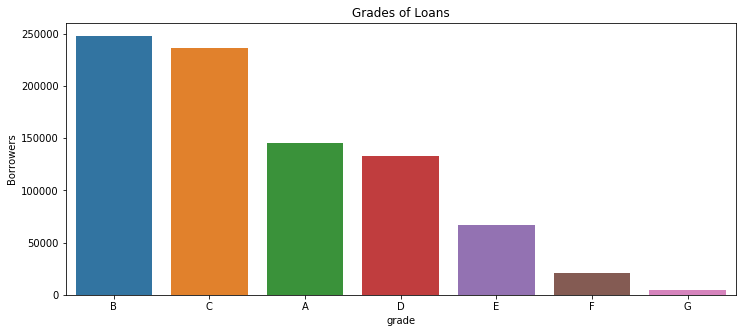

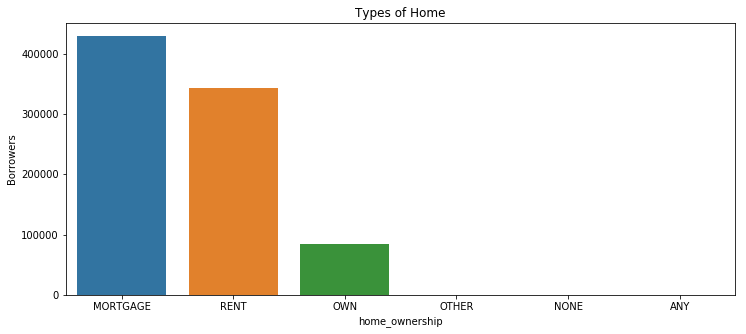

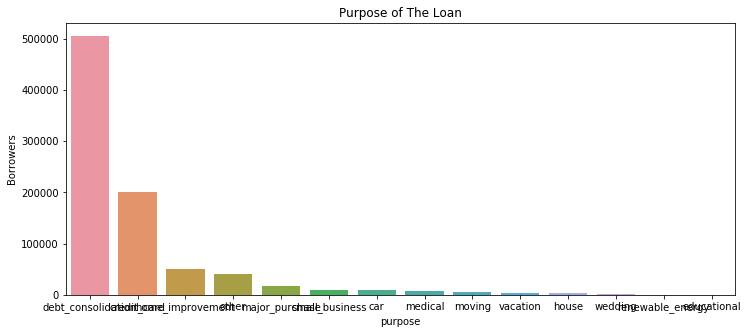

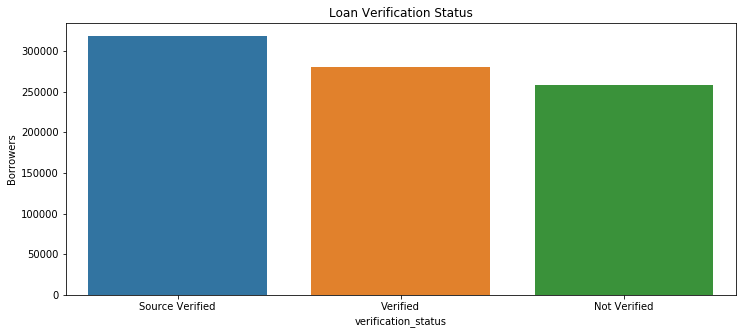

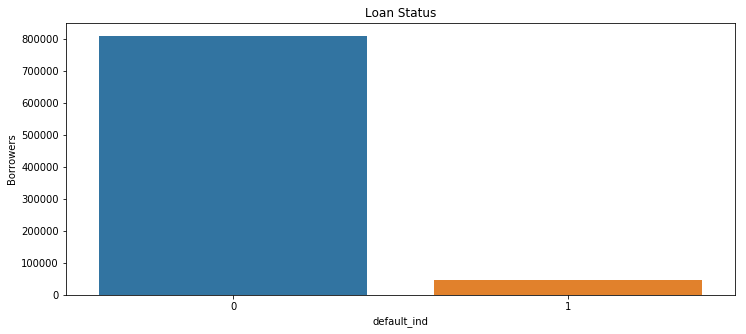

In [11]:
import seaborn as sns
grade=data['grade'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Grades of Loans')
plt.ylabel('Borrowers')
plt.xlabel('grade')
sns.barplot(x=grade.index, y=grade.values)

home=data['home_ownership'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Types of Home')
plt.xlabel('home_ownership')
plt.ylabel('Borrowers')
sns.barplot(x=home.index, y=home.values)

purpose=data['purpose'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Purpose of The Loan')
plt.ylabel('Borrowers')
plt.xlabel('purpose')
sns.barplot(x=purpose.index, y=purpose.values)

verifi_status= data['verification_status'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Loan Verification Status')
plt.ylabel('Borrowers')
plt.xlabel('verification_status')
sns.barplot(x=verifi_status.index , y=verifi_status.values)

default=data['default_ind'].value_counts()
plt.figure(figsize=(12,5))
plt.title('Loan Status')
plt.ylabel('Borrowers')
plt.xlabel('default_ind')
sns.barplot(x=default.index, y= default.values)
    

#### Numerical variables

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


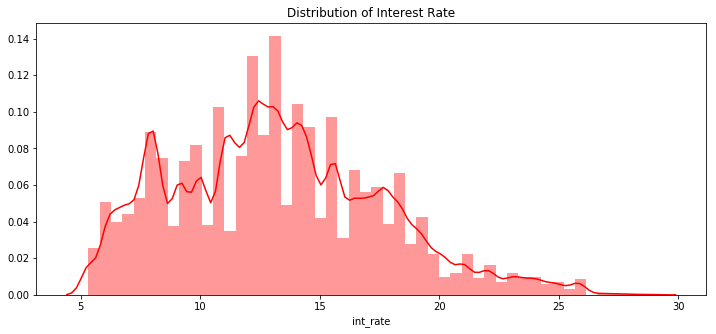

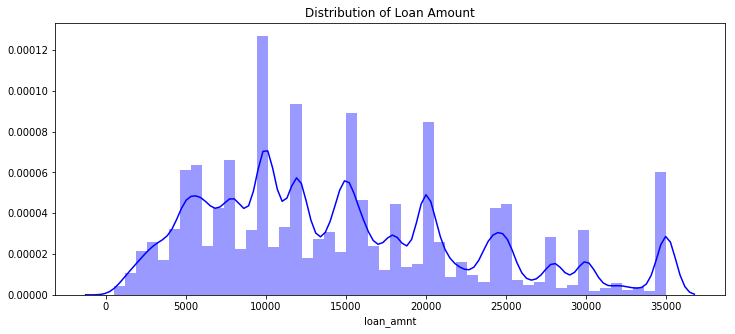

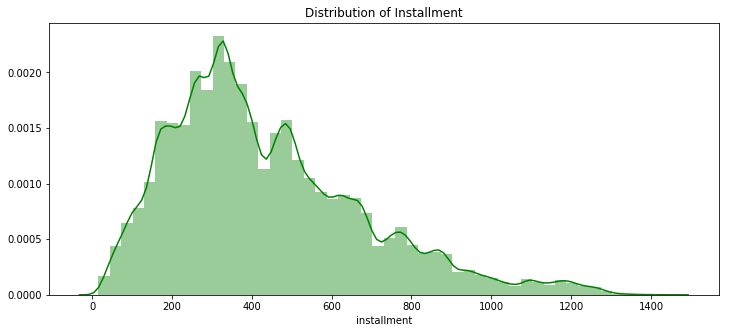

In [12]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Interest Rate')
sns.distplot(data['int_rate'], color='r')

plt.figure(figsize=(12,5))
plt.title('Distribution of Loan Amount')
sns.distplot(data['loan_amnt'], color='b')

plt.figure(figsize=(12,5))
plt.title('Distribution of Installment')
sns.distplot(data['installment'], color='g')

### Feature Engineering and Variable Selection

In [13]:
data['amt_difference'] = 'eq'
data.loc[ ( data['funded_amnt'] - data['funded_amnt_inv']) > 0, 'amt_difference' ] = 'less'

# Make categorical

data[ 'delinq_2yrs_cat' ] = 'no'
data.loc[ data [ 'delinq_2yrs' ] > 0, 'delinq_2yrs_cat' ] = 'yes'

data[ 'inq_last_6mths_cat' ] = 'no'
data.loc[ data['inq_last_6mths' ] > 0, 'inq_last_6mths_cat' ] = 'yes'

data[ 'pub_rec_cat' ] = 'no'
data.loc[ data['pub_rec'] > 0,'pub_rec_cat' ] = 'yes'

# Create new metric
data['acc_ratio'] = data.open_acc / data.total_acc

In [14]:
# Getting all factor variables
factor_x = [col for col in data.columns.values if data[col].dtype == 'object']
    
# Getting all character variables
data_cat = data[factor_x]
data_cat.head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,amt_difference,delinq_2yrs_cat,inq_last_6mths_cat,pub_rec_cat
0,36,B,B2,RENT,Verified,Dec-2011,credit_card,AZ,Jan-1985,f,Jan-2015,NaN,Jan-2016,less,no,yes,no
1,60,C,C4,RENT,Source Verified,Dec-2011,car,GA,Apr-1999,f,Apr-2013,NaN,Sep-2013,eq,no,yes,no
2,36,C,C5,RENT,Not Verified,Dec-2011,small_business,IL,Nov-2001,f,Jun-2014,NaN,Jan-2016,eq,no,yes,no
3,36,C,C1,RENT,Source Verified,Dec-2011,other,CA,Feb-1996,f,Jan-2015,NaN,Jan-2015,eq,no,yes,no
4,60,B,B5,RENT,Source Verified,Dec-2011,other,OR,Jan-1996,f,Jan-2016,Feb-2016,Jan-2016,eq,no,no,no


In [15]:
# Getting all numeric variables
data_num = data.drop(factor_x,axis=1)
data_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,acc_ratio
0,5000.0,5000.0,4975.0,10.65,162.87,10.0,24000.0,27.65,0.0,1.0,...,0.00,0.00,0.00,171.62,0.0,NaN,NaN,NaN,0,0.333333
1,2500.0,2500.0,2500.0,15.27,59.83,1.0,30000.0,1.00,0.0,5.0,...,0.00,117.08,1.11,119.66,0.0,NaN,NaN,NaN,1,0.750000
2,2400.0,2400.0,2400.0,15.96,84.33,10.0,12252.0,8.72,0.0,2.0,...,0.00,0.00,0.00,649.91,0.0,NaN,NaN,NaN,0,0.200000
3,10000.0,10000.0,10000.0,13.49,339.31,10.0,49200.0,20.00,0.0,1.0,...,16.97,0.00,0.00,357.48,0.0,NaN,NaN,NaN,0,0.270270
4,3000.0,3000.0,3000.0,12.69,67.79,1.0,80000.0,17.94,0.0,0.0,...,0.00,0.00,0.00,67.79,0.0,NaN,NaN,NaN,0,0.394737


In [16]:
# Correlation
cor = data_num.corr()
print(cor)

                            loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                    1.000000     0.999265         0.997601  0.142966   
funded_amnt                  0.999265     1.000000         0.998485  0.143116   
funded_amnt_inv              0.997601     0.998485         1.000000  0.143374   
int_rate                     0.142966     0.143116         0.143374  1.000000   
installment                  0.944870     0.945903         0.944149  0.130468   
emp_length                   0.104210     0.104460         0.105573  0.010198   
annual_inc                   0.335209     0.335002         0.334356 -0.073825   
dti                          0.020189     0.020583         0.021489  0.078454   
delinq_2yrs                 -0.000739    -0.000424         0.000050  0.055400   
inq_last_6mths              -0.028928    -0.029279        -0.030462  0.231705   
mths_since_last_delinq      -0.039230    -0.039290        -0.037936 -0.030431   
open_acc                    

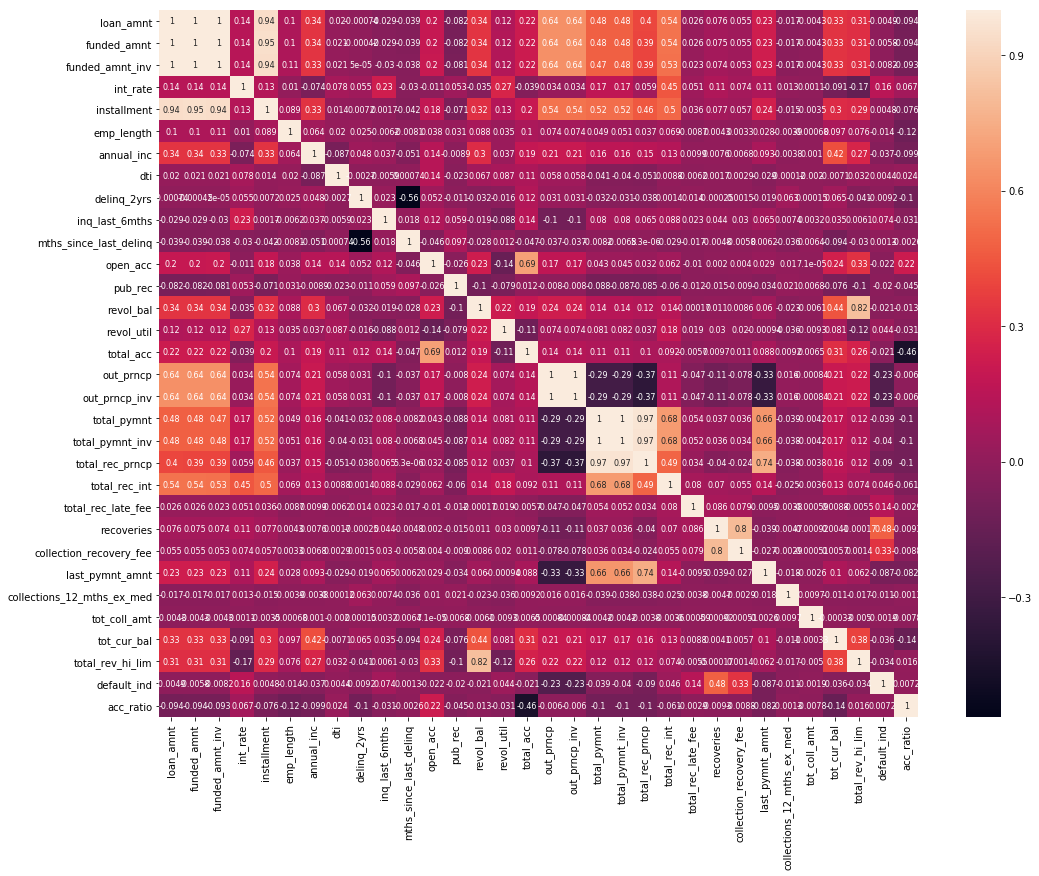

In [17]:
# Correlation plot
correlation = data_num.corr()
plt.figure(figsize=(17,13))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})

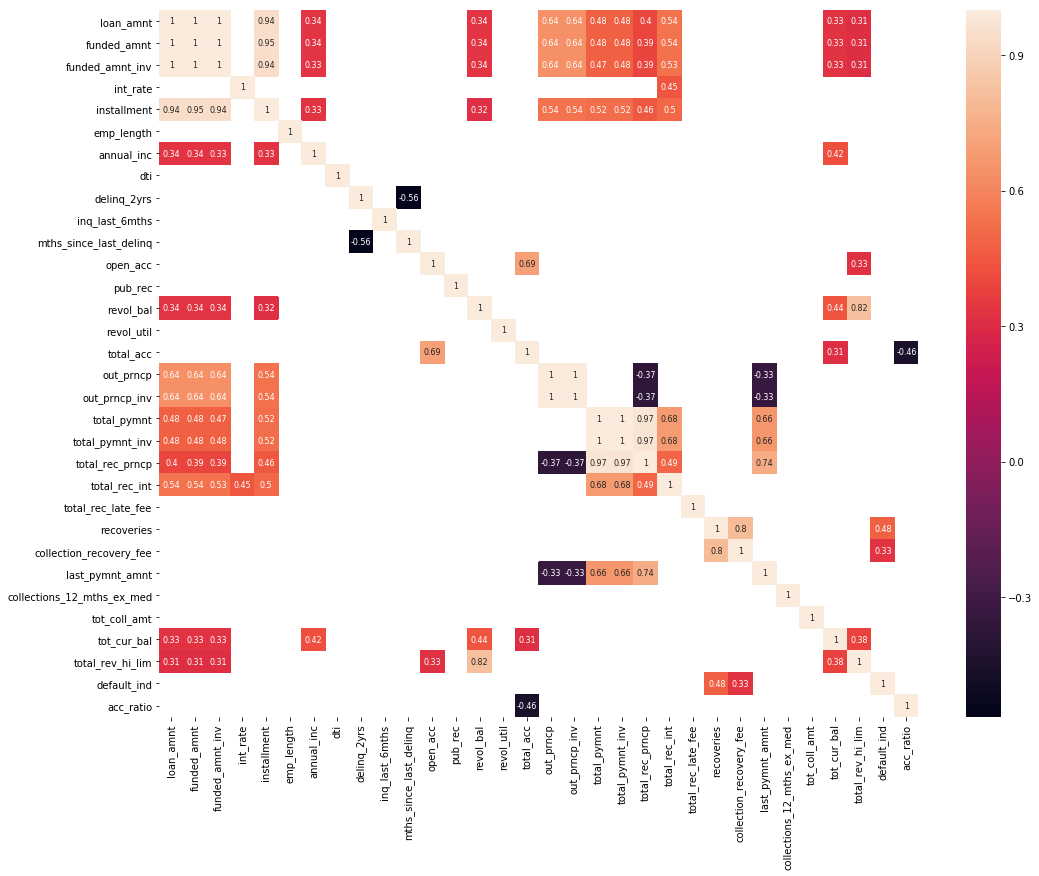

In [44]:
# correlation map
correlation = data_num.corr()
plt.figure(figsize=(17,13))
sns.heatmap(correlation[(correlation > 0.3) | (correlation < -0.3)],xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})

Finally the feature that we want to use to model default are as follows :

In [18]:
features = [
            'loan_amnt', 'amt_difference', 'term', 
            'installment', 'grade','emp_length',
            'home_ownership', 'annual_inc','verification_status',
            'purpose', 'dti', 'delinq_2yrs_cat', 'inq_last_6mths_cat', 
            'open_acc', 'pub_rec', 'pub_rec_cat', 'acc_ratio', 'initial_list_status',
            'issue_d','default_ind'
           ]

data = data[features]

# Drop any residual missing values
data.dropna( axis=0, how = 'any', inplace = True )

Divide the data into model training dataset and OOT (out-of-time) test dataset.
The model training dataset should be used to train and build models and the final performance should be on OOT Test data.

In [19]:
oot_test_months = ['Jun-2015', 'Jul-2015', 'Aug-2015', 'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015']

train = data.loc [ -data.issue_d.isin(oot_test_months) ]
oot_test = data.loc [ data.issue_d.isin(oot_test_months) ]

Convert categorical variables by one hot encoding so that they can be used by the models.

In [20]:
categorical_features = ['term','amt_difference', 'grade', 'home_ownership', 'verification_status', 
                            'purpose', 'delinq_2yrs_cat', 'inq_last_6mths_cat', 'initial_list_status', 'pub_rec_cat']

Converting categorical variable into dummy variable so that they can be used in the models

In [21]:
X_model_train = pd.get_dummies(train[train.columns[:-2]], columns=categorical_features).astype(float)
y_model_train = train['default_ind']

X_oot_test = pd.get_dummies(oot_test[oot_test.columns[:-2]], columns=categorical_features).astype(float)
y_oot_test = oot_test['default_ind']

print(X_model_train.shape, X_oot_test.shape)

(598978, 50) (256991, 47)


Above we see that there is a mismatch in the number of columns in model training and OOT test data. This is because there are some categories in some variables that are present in the training dataset but not OOT test. We should remove those variables from training data to avoid errors later.

In [22]:
vars_not_in_oot_test = ['home_ownership_OWN','home_ownership_RENT','purpose_educational']

X_model_train.drop( vars_not_in_oot_test , axis = 1, inplace = True )

print(X_model_train.shape)

(598978, 47)


## Model Building and Validation


Let's start modelling by importing a few modules. Features are all on different scale, so it is wise to rescale all features in the range -1, +1


### Preprocessing

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

X_scaled_model_train = preprocessing.scale(X_model_train)
X_scaled_oot_test = preprocessing.scale(X_oot_test)

print(X_scaled_model_train.shape, X_scaled_oot_test.shape)

(598978, 47) (256991, 47)


### Model Building, testing and validation

The below function can be used to run different modelling techniques and study the performance (emperically and visually)

In [39]:
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'LogisticRegression' : LogisticRegression(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10)
            }
    cols = ['model', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()
    accuracy_score = dict()
    
    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
        accuracy_score[clf_name] = metrics.accuracy_score(y_test, y_pred)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix, accuracy_score

We first try with the data as-is

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


computing LogisticRegression - Non-balanced 
computing RandomForestClassifier - Non-balanced 


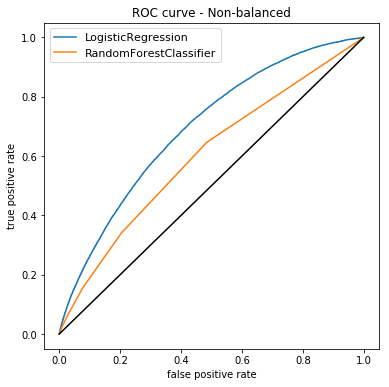

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled_model_train, y_model_train.values, 
                                                    test_size=0.4, random_state=0)

models_report, conf_matrix, accuracy_score = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')

In [43]:
models_report

,model,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,LogisticRegression,0.694357,0.75000,0.000162,0.000324,Non-balanced
1,RandomForestClassifier,0.600549,0.18569,0.005893,0.011424,Non-balanced


After looking at the model report performance tells us that the techniques are not peforming well as the recall is very poor. An important reason for this can be that the classes are unbalanced. We try another iteration by balancing the classes.


In [106]:
conf_matrix['LogisticRegression']

Predicted,0,1
True,,
0,221096,1
1,18492,3


In [107]:
accuracy_score['LogisticRegression']

0.9228146181842466

In [113]:
accuracy_score['RandomForestClassifier']

0.9213871915589836

To balance classes before training again, we use the SMOTE technique. 

> The classes are unbalanced and there is need the data to be more balanced for better performance.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


computing LogisticRegression - Balanced 
computing RandomForestClassifier - Balanced 


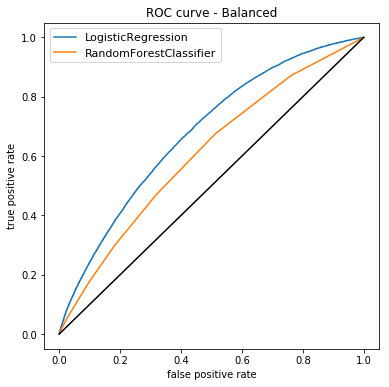

In [108]:
from imblearn.over_sampling import SMOTE
index_split = int(len(X_scaled_model_train)/2)
X_train, y_train = SMOTE().fit_sample(X_scaled_model_train[0:index_split, :], y_model_train[0:index_split])
X_test, y_test = X_scaled_model_train[index_split:], y_model_train[index_split:]

models_report_bal, conf_matrix_bal, accuracy_score_bal  = run_models(X_train, y_train, X_test, y_test, model_type = 'Balanced')

Even though the precision has dropped, we can see that there is a huge improvement in recall, this shows how balancing classes can improve performance.

In [109]:
models_report_bal

,model,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,LogisticRegression,0.678752,0.081096,0.566188,0.141872,Balanced
1,RandomForestClassifier,0.608215,0.086766,0.090621,0.088652,Balanced


In [110]:
conf_matrix_bal['LogisticRegression']

Predicted,0,1
True,,
0,194174,91113
1,6161,8041


In [114]:
accuracy_score_bal['LogisticRegression']

0.6752000908213657

In [112]:
accuracy_score_bal['RandomForestClassifier']

0.9116461706439969